# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from networkx.drawing.nx_pydot import write_dot
from networkx.linalg.graphmatrix import *
from networkx.algorithms.approximation import *
#from networkx.centrality import closn
from networkx.algorithms import *
import gc
gc.collect()


21

In [2]:
#input = pd.read_csv("/home/abhishek/Graph/titanic.csv")
#input = pd.read_csv("/home/abhishek/Graph/iris.csv")
input = pd.read_csv("/home/abhishek/Graph/dataR2.csv")

In [3]:
input.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.5,70,2.7,0.5,8.8,9.7,8.0,417.1,1
1,83,20.7,92,3.1,0.7,8.8,5.4,4.1,468.8,1
2,82,23.1,91,4.5,1.0,17.9,22.4,9.3,554.7,1
3,68,21.4,77,3.2,0.6,9.9,7.2,12.8,928.2,1
4,86,21.1,92,3.5,0.8,6.7,4.8,10.6,773.9,1


In [4]:
del(input["Classification"])
#print(input["date_time"][0])
#input[] = input["date_time"].str.slice(0,4)
#input['Month'] = input["date_time"].str.slice(5,7)
#input['day'] = input["date_time"].str.slice(8,10)
#input['Hour'] = input["date_time"].str.slice(11,13)

In [5]:
total_rows=len(input.axes[0])
total_cols=len(input.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print("Max of connection in graph: "+str(total_rows*total_cols))
input.describe()

Number of Rows: 116
Number of Columns: 9
Max of connection in graph: 1044


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.586207,97.793103,10.010345,2.693103,26.616379,10.184483,14.729310,534.646552
std,16.112766,5.020911,22.525162,10.068465,3.644262,19.183616,6.844161,12.386269,345.907378
min,24.000000,18.400000,60.000000,2.400000,0.500000,4.300000,1.700000,3.200000,45.800000
25%,45.000000,22.975000,85.750000,4.375000,0.900000,12.300000,5.500000,6.900000,269.950000
50%,56.000000,27.650000,92.000000,5.900000,1.400000,20.300000,8.350000,10.850000,471.350000
75%,71.000000,31.225000,102.000000,11.150000,2.900000,37.350000,11.825000,17.800000,700.100000
max,89.000000,38.600000,201.000000,58.500000,25.100000,90.300000,38.000000,82.100000,1698.400000


In [6]:
#input['temp_level'] = pd.qcut(input['temp'], q=10, labels=(1,2,3,4,5,6,7,8,9,10))
#iris['snow_1h_level'] = pd.qcut(iris['snow_1h'], q=10, labels=(1,2,3,4,5,6,7,8,9,10))
#input['clouds_all_level'] = pd.qcut(input['clouds_all'], q=5, labels=(1,2,3,4,5))
#del(input['temp'])
#del(input['rain_1h'])
#del(input['snow_1h'])
#del(input['clouds_all'])

In [7]:
#input(input)
input.head(5) 

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.5,70,2.7,0.5,8.8,9.7,8.0,417.1
1,83,20.7,92,3.1,0.7,8.8,5.4,4.1,468.8
2,82,23.1,91,4.5,1.0,17.9,22.4,9.3,554.7
3,68,21.4,77,3.2,0.6,9.9,7.2,12.8,928.2
4,86,21.1,92,3.5,0.8,6.7,4.8,10.6,773.9


In [8]:
#input = Survived_0
input.shape

(116, 9)

In [9]:
'''input['Age_prect_10'] = pd.qcut(input['Age'], q=4)
input['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))

input['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)
input['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))

input.loc[input['Sex'] == 'male', 'sex'] = '1'
input.loc[input['Sex'] == 'female', 'sex'] = '0'
#input.head(5)'''

"input['Age_prect_10'] = pd.qcut(input['Age'], q=4)\ninput['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))\n\ninput['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)\ninput['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))\n\ninput.loc[input['Sex'] == 'male', 'sex'] = '1'\ninput.loc[input['Sex'] == 'female', 'sex'] = '0'\n#input.head(5)"

In [10]:
#drop un-use column
'''del input['Fare']
del input['Age'] 
del input['Age_prect_10'] 
del input['Fare_prect_10'] 
del input['Sex']''' 
input.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.5,70,2.7,0.5,8.8,9.7,8.0,417.1
1,83,20.7,92,3.1,0.7,8.8,5.4,4.1,468.8
2,82,23.1,91,4.5,1.0,17.9,22.4,9.3,554.7
3,68,21.4,77,3.2,0.6,9.9,7.2,12.8,928.2
4,86,21.1,92,3.5,0.8,6.7,4.8,10.6,773.9


In [11]:
input.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1'],
      dtype='object')

In [12]:
def create_graph_data(input):
    another_input_list = []
    count = 0
    for i in range(len(input.axes[1])-1): #range(len(input.axes[1])-1)
        if len(input.axes[1]) > i :
            current_col = input.axes[1][i]
            next_col = input.axes[1][i+1]

            for j in range(len(input.axes[0])):
                item = str(input.axes[1][i])+'_'+str(input[current_col][j]),str(input.axes[1][i+1])+'_'+str(input[next_col][j]),input[next_col][j]
                another_input_list.append(item)
                count = count + j
            #
            #print(next_col,len(input.axes[1]),i,j)
        else:
            print("end")

    #print('number of combination of edge (%d)' % (count))
    
    return another_input_list

In [13]:
def graph_create(another_input_list):
    
    MG_1 = nx.DiGraph()
    MG_1.add_weighted_edges_from(another_input_list)
    pos = nx.nx_agraph.graphviz_layout(MG_1)
    nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
    plt.axis("Off")
    plt.show()
    print(MG_1.nodes())
    print('Number of edges',MG_1.number_of_edges())
    print('Number of Nodes',MG_1.number_of_nodes())
    return MG_1

# this code will print nice graph

In [14]:
#### this code will print nice graph
#MG_1 = graph_create(another_input_list)
#nx.nx_agraph.view_pygraphviz(MG_1)

In [15]:
def column_arrange (col_name,edge_impotance_order):
    col_name = list(col_name)
    temp = list(edge_impotance_order)[0].rpartition('_')[0]
    print('High ranked column ---->',temp)
    #print('\nOld column name order\n',col_name)
    col_name.remove(temp)
    col_name.insert(0,temp)
    #print('\nNew column name order\n',col_name)
    
    return list(col_name),temp
    #edge_impotance_order.keys()
    #google_PGR_O = google_matrix(MG_1, alpha=0.9)
    #google_PGR_O

In [16]:
def variable_imp (another_input_list):
    
    ################
    # approach-1    
    ################
    print("\nDiGraph")
    MG_1 = graph_create(another_input_list)
    edge_impotance_weight = {}
    edge_impotance_order = {}
    W=MG_1.edges.data('weight', default=1)
    count = 1
    while (MG_1.number_of_nodes() > 0):
        '''
        pos = nx.nx_agraph.graphviz_layout(MG_1)
        nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
        plt.axis("Off")
        plt.show()
        '''
        PGR_O = nx.pagerank(MG_1, alpha=0.90,max_iter=100, weight=W) 
        # , nstart=W this could be the start value of each node
        #type(PGR_O)
        #print(max(PGR_O.keys()))
        #print(round(max(PGR_O.values()),5))  # maximum rank of the node

        for key, value in PGR_O.items():
            if round(value,5) == round(max(PGR_O.values()),5):
                #print('Edge name -> ',key, '->', round(value,5))
                edge_impotance_weight.update({key:round(value,5)})
                edge_impotance_order.update({key:count})
                MG_1.remove_node(key)
                count = count + 1
                #print('Number of edge',MG_1.number_of_edges(key))

    return edge_impotance_weight,edge_impotance_order

# Run one time with default order of column

In [17]:
# Run one time with default order of column
col_name = input.columns
input = input.reindex(columns=col_name)
input.head(5)
#another_input_list = create_graph_data(input)
#another_input_list[0:5]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.5,70,2.7,0.5,8.8,9.7,8.0,417.1
1,83,20.7,92,3.1,0.7,8.8,5.4,4.1,468.8
2,82,23.1,91,4.5,1.0,17.9,22.4,9.3,554.7
3,68,21.4,77,3.2,0.6,9.9,7.2,12.8,928.2
4,86,21.1,92,3.5,0.8,6.7,4.8,10.6,773.9


In [18]:
#another_input_list = create_graph_data(input)

# create graph and node important for data set
#edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)


DiGraph


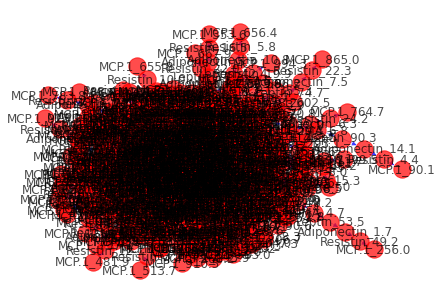

['Age_48', 'BMI_23.5', 'Age_83', 'BMI_20.7', 'Age_82', 'BMI_23.1', 'Age_68', 'BMI_21.4', 'Age_86', 'BMI_21.1', 'Age_49', 'BMI_22.9', 'Age_89', 'BMI_22.7', 'Age_76', 'BMI_23.8', 'Age_73', 'BMI_22.0', 'Age_75', 'BMI_23.0', 'Age_34', 'BMI_21.5', 'Age_29', 'Age_25', 'Age_24', 'BMI_18.7', 'Age_38', 'BMI_23.3', 'Age_44', 'BMI_20.8', 'Age_47', 'Age_61', 'BMI_32.0', 'Age_64', 'BMI_34.5', 'Age_32', 'BMI_36.5', 'Age_36', 'BMI_28.6', 'BMI_32.3', 'Age_35', 'BMI_30.3', 'Age_54', 'BMI_30.5', 'Age_45', 'BMI_37.0', 'Age_50', 'BMI_38.6', 'Age_66', 'BMI_31.4', 'BMI_35.3', 'BMI_34.2', 'BMI_36.2', 'Age_53', 'BMI_36.8', 'Age_28', 'BMI_35.9', 'Age_43', 'BMI_34.4', 'Age_51', 'BMI_27.7', 'Age_67', 'BMI_29.6', 'BMI_31.2', 'Age_69', 'BMI_35.1', 'Age_60', 'BMI_26.3', 'Age_77', 'BMI_35.6', 'BMI_29.2', 'BMI_27.2', 'BMI_27.3', 'BMI_32.5', 'Age_71', 'BMI_25.7', 'Age_78', 'BMI_25.3', 'BMI_29.4', 'Age_85', 'BMI_26.6', 'BMI_27.1', 'BMI_25.9', 'BMI_21.3', 'BMI_21.0', 'BMI_24.2', 'Age_42', 'BMI_19.1', 'Age_62', 'BMI_22.5

High ranked column ----> HOMA

DiGraph


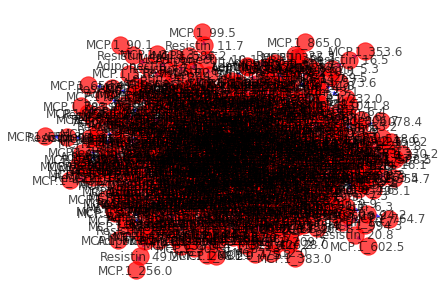

['HOMA_0.5', 'Age_48', 'HOMA_0.7', 'Age_83', 'HOMA_1.0', 'Age_82', 'HOMA_0.6', 'Age_68', 'HOMA_0.8', 'Age_86', 'Age_49', 'HOMA_0.9', 'Age_89', 'HOMA_1.9', 'Age_76', 'Age_73', 'Age_75', 'Age_34', 'HOMA_1.1', 'Age_29', 'Age_25', 'HOMA_1.3', 'Age_24', 'Age_38', 'HOMA_1.6', 'Age_44', 'Age_47', 'HOMA_3.8', 'Age_61', 'Age_64', 'HOMA_3.0', 'Age_32', 'Age_36', 'HOMA_1.2', 'Age_35', 'Age_54', 'HOMA_1.4', 'Age_45', 'HOMA_1.8', 'Age_50', 'HOMA_2.1', 'Age_66', 'HOMA_1.5', 'HOMA_3.9', 'HOMA_2.5', 'Age_53', 'Age_28', 'HOMA_5.1', 'Age_43', 'Age_51', 'Age_67', 'Age_69', 'Age_60', 'Age_77', 'HOMA_3.3', 'Age_71', 'Age_78', 'HOMA_2.3', 'Age_85', 'HOMA_7.1', 'HOMA_3.5', 'HOMA_2.9', 'HOMA_4.9', 'Age_42', 'Age_62', 'HOMA_1.7', 'Age_59', 'Age_46', 'HOMA_4.5', 'HOMA_15.3', 'Age_72', 'HOMA_7.8', 'HOMA_2.6', 'Age_55', 'HOMA_20.6', 'HOMA_5.3', 'Age_41', 'HOMA_2.4', 'Age_81', 'HOMA_7.0', 'HOMA_3.1', 'Age_65', 'HOMA_25.1', 'HOMA_6.0', 'HOMA_5.7', 'Age_58', 'HOMA_13.2', 'Age_40', 'HOMA_6.5', 'Age_52', 'HOMA_8.2', '

High ranked column ----> MCP.1

DiGraph


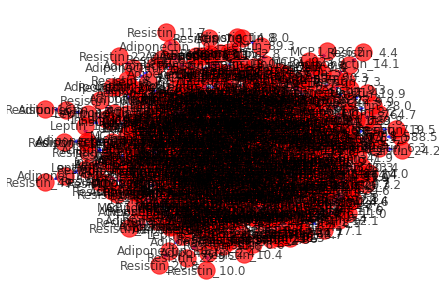

['MCP.1_417.1', 'HOMA_0.5', 'MCP.1_468.8', 'HOMA_0.7', 'MCP.1_554.7', 'HOMA_1.0', 'MCP.1_928.2', 'HOMA_0.6', 'MCP.1_773.9', 'HOMA_0.8', 'MCP.1_530.4', 'MCP.1_1256.1', 'HOMA_0.9', 'MCP.1_280.7', 'HOMA_1.9', 'MCP.1_136.9', 'MCP.1_318.3', 'MCP.1_354.6', 'MCP.1_174.8', 'HOMA_1.1', 'MCP.1_313.7', 'MCP.1_632.2', 'HOMA_1.3', 'MCP.1_165.0', 'MCP.1_63.6', 'HOMA_1.6', 'MCP.1_191.7', 'MCP.1_444.4', 'HOMA_3.8', 'MCP.1_252.4', 'MCP.1_588.5', 'HOMA_3.0', 'MCP.1_534.2', 'MCP.1_572.8', 'MCP.1_905.0', 'HOMA_1.2', 'MCP.1_733.8', 'MCP.1_1227.9', 'MCP.1_586.2', 'HOMA_1.4', 'MCP.1_887.2', 'HOMA_1.8', 'MCP.1_1102.1', 'HOMA_2.1', 'MCP.1_667.9', 'HOMA_1.5', 'MCP.1_581.3', 'MCP.1_865.0', 'HOMA_3.9', 'MCP.1_695.8', 'HOMA_2.5', 'MCP.1_358.6', 'MCP.1_960.2', 'HOMA_5.1', 'MCP.1_473.9', 'MCP.1_585.3', 'MCP.1_634.6', 'MCP.1_263.5', 'MCP.1_379.0', 'MCP.1_618.3', 'MCP.1_698.8', 'MCP.1_377.2', 'HOMA_3.3', 'MCP.1_335.4', 'MCP.1_270.1', 'MCP.1_201.0', 'MCP.1_225.9', 'MCP.1_206.8', 'MCP.1_209.7', 'MCP.1_215.8', 'HOMA_2.3'

High ranked column ----> Glucose

DiGraph


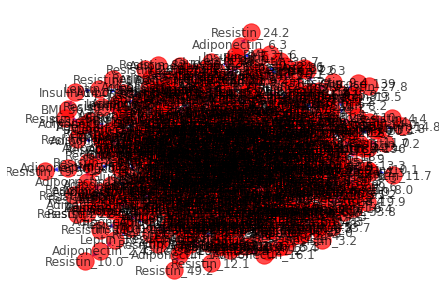

['Glucose_70', 'MCP.1_417.1', 'Glucose_92', 'MCP.1_468.8', 'Glucose_91', 'MCP.1_554.7', 'Glucose_77', 'MCP.1_928.2', 'MCP.1_773.9', 'MCP.1_530.4', 'MCP.1_1256.1', 'Glucose_118', 'MCP.1_280.7', 'Glucose_97', 'MCP.1_136.9', 'Glucose_83', 'MCP.1_318.3', 'Glucose_78', 'MCP.1_354.6', 'Glucose_82', 'MCP.1_174.8', 'MCP.1_313.7', 'Glucose_88', 'MCP.1_632.2', 'Glucose_75', 'MCP.1_165.0', 'Glucose_86', 'MCP.1_63.6', 'Glucose_84', 'MCP.1_191.7', 'Glucose_85', 'MCP.1_444.4', 'Glucose_95', 'MCP.1_252.4', 'Glucose_87', 'MCP.1_588.5', 'MCP.1_534.2', 'MCP.1_572.8', 'MCP.1_905.0', 'MCP.1_733.8', 'Glucose_90', 'MCP.1_1227.9', 'MCP.1_586.2', 'Glucose_106', 'MCP.1_887.2', 'MCP.1_1102.1', 'MCP.1_667.9', 'Glucose_80', 'MCP.1_581.3', 'Glucose_101', 'MCP.1_865.0', 'MCP.1_695.8', 'MCP.1_358.6', 'Glucose_89', 'MCP.1_960.2', 'MCP.1_473.9', 'Glucose_79', 'MCP.1_585.3', 'MCP.1_634.6', 'MCP.1_263.5', 'Glucose_103', 'MCP.1_379.0', 'Glucose_76', 'MCP.1_618.3', 'MCP.1_698.8', 'Glucose_94', 'MCP.1_377.2', 'MCP.1_335.4'

High ranked column ----> Resistin

DiGraph


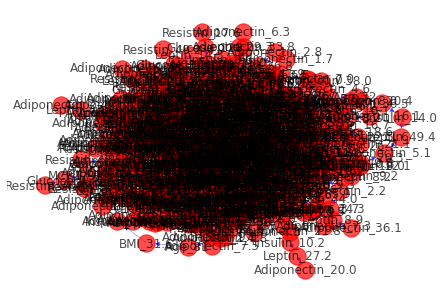

['Resistin_8.0', 'Glucose_70', 'Resistin_4.1', 'Glucose_92', 'Resistin_9.3', 'Glucose_91', 'Resistin_12.8', 'Glucose_77', 'Resistin_10.6', 'Resistin_10.3', 'Resistin_12.9', 'Resistin_5.1', 'Glucose_118', 'Resistin_6.3', 'Glucose_97', 'Resistin_7.1', 'Glucose_83', 'Resistin_6.9', 'Glucose_78', 'Resistin_4.6', 'Glucose_82', 'Glucose_88', 'Resistin_9.4', 'Glucose_75', 'Resistin_7.6', 'Glucose_86', 'Resistin_3.3', 'Glucose_84', 'Resistin_13.7', 'Glucose_85', 'Resistin_6.7', 'Glucose_95', 'Resistin_17.1', 'Glucose_87', 'Resistin_9.2', 'Resistin_5.6', 'Resistin_24.6', 'Resistin_16.4', 'Resistin_10.2', 'Glucose_90', 'Resistin_8.7', 'Resistin_11.8', 'Glucose_106', 'Resistin_23.4', 'Resistin_22.0', 'Resistin_15.7', 'Glucose_80', 'Resistin_22.3', 'Glucose_101', 'Resistin_21.4', 'Glucose_89', 'Resistin_10.4', 'Resistin_4.2', 'Glucose_79', 'Resistin_82.1', 'Resistin_20.3', 'Glucose_103', 'Resistin_17.3', 'Glucose_76', 'Resistin_8.4', 'Glucose_94', 'Glucose_93', 'Resistin_4.3', 'Glucose_102', 'Resi

High ranked column ----> HOMA

DiGraph


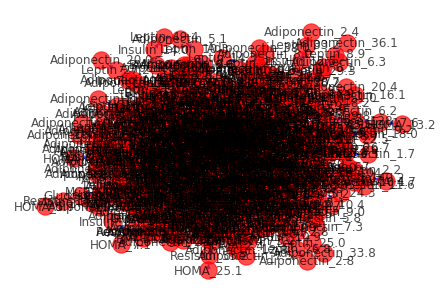

['HOMA_0.5', 'Resistin_8.0', 'HOMA_0.7', 'Resistin_4.1', 'HOMA_1.0', 'Resistin_9.3', 'HOMA_0.6', 'Resistin_12.8', 'HOMA_0.8', 'Resistin_10.6', 'Resistin_10.3', 'HOMA_0.9', 'Resistin_12.9', 'HOMA_1.9', 'Resistin_5.1', 'Resistin_6.3', 'Resistin_7.1', 'Resistin_6.9', 'HOMA_1.1', 'Resistin_4.6', 'HOMA_1.3', 'Resistin_9.4', 'HOMA_1.6', 'Resistin_7.6', 'Resistin_3.3', 'HOMA_3.8', 'Resistin_13.7', 'Resistin_6.7', 'HOMA_3.0', 'Resistin_17.1', 'Resistin_9.2', 'Resistin_5.6', 'HOMA_1.2', 'Resistin_24.6', 'Resistin_16.4', 'Resistin_10.2', 'HOMA_1.4', 'Resistin_8.7', 'HOMA_1.8', 'Resistin_11.8', 'HOMA_2.1', 'Resistin_23.4', 'HOMA_1.5', 'Resistin_22.0', 'Resistin_15.7', 'HOMA_3.9', 'Resistin_22.3', 'HOMA_2.5', 'Resistin_21.4', 'HOMA_5.1', 'Resistin_10.4', 'Resistin_4.2', 'Resistin_82.1', 'Resistin_20.3', 'Resistin_17.3', 'HOMA_3.3', 'Resistin_8.4', 'Resistin_4.3', 'Resistin_4.5', 'Resistin_4.7', 'HOMA_2.3', 'Resistin_9.6', 'HOMA_7.1', 'Resistin_8.5', 'HOMA_3.5', 'Resistin_23.0', 'Resistin_28.0', 'H

High ranked column ----> Adiponectin

DiGraph


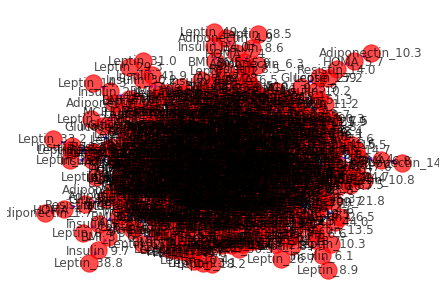

['Adiponectin_9.7', 'HOMA_0.5', 'Adiponectin_5.4', 'HOMA_0.7', 'Adiponectin_22.4', 'HOMA_1.0', 'Adiponectin_7.2', 'HOMA_0.6', 'Adiponectin_4.8', 'HOMA_0.8', 'Adiponectin_13.7', 'Adiponectin_5.6', 'HOMA_0.9', 'Adiponectin_13.3', 'HOMA_1.9', 'Adiponectin_10.4', 'Adiponectin_11.6', 'Adiponectin_13.1', 'Adiponectin_26.7', 'HOMA_1.1', 'Adiponectin_23.7', 'Adiponectin_36.1', 'HOMA_1.3', 'Adiponectin_18.0', 'Adiponectin_20.3', 'HOMA_1.6', 'Adiponectin_38.0', 'Adiponectin_7.8', 'HOMA_3.8', 'Adiponectin_5.5', 'Adiponectin_5.1', 'HOMA_3.0', 'Adiponectin_8.6', 'Adiponectin_7.6', 'Adiponectin_6.2', 'HOMA_1.2', 'Adiponectin_9.0', 'Adiponectin_4.6', 'HOMA_1.4', 'Adiponectin_4.7', 'HOMA_1.8', 'HOMA_2.1', 'Adiponectin_7.0', 'HOMA_1.5', 'Adiponectin_7.5', 'HOMA_3.9', 'Adiponectin_20.0', 'HOMA_2.5', 'Adiponectin_8.3', 'HOMA_5.1', 'Adiponectin_3.2', 'Adiponectin_2.2', 'Adiponectin_4.3', 'Adiponectin_6.8', 'Adiponectin_8.1', 'Adiponectin_7.4', 'Adiponectin_9.3', 'HOMA_3.3', 'Adiponectin_11.8', 'Adiponecti

High ranked column ----> Age

DiGraph


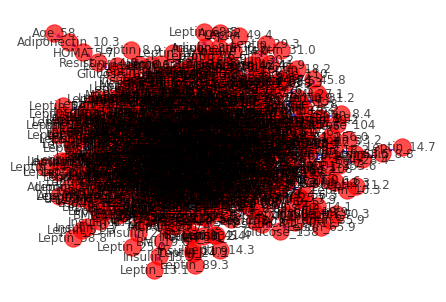

['Age_48', 'Adiponectin_9.7', 'Age_83', 'Adiponectin_5.4', 'Age_82', 'Adiponectin_22.4', 'Age_68', 'Adiponectin_7.2', 'Age_86', 'Adiponectin_4.8', 'Age_49', 'Adiponectin_13.7', 'Age_89', 'Adiponectin_5.6', 'Age_76', 'Adiponectin_13.3', 'Age_73', 'Adiponectin_10.4', 'Age_75', 'Adiponectin_11.6', 'Age_34', 'Adiponectin_13.1', 'Age_29', 'Adiponectin_26.7', 'Age_25', 'Adiponectin_23.7', 'Age_24', 'Adiponectin_36.1', 'Age_38', 'Adiponectin_18.0', 'Age_44', 'Adiponectin_20.3', 'Age_47', 'Adiponectin_38.0', 'Age_61', 'Adiponectin_7.8', 'Age_64', 'Adiponectin_5.5', 'Age_32', 'Adiponectin_5.1', 'Age_36', 'Adiponectin_8.6', 'Adiponectin_7.6', 'Adiponectin_6.2', 'Age_35', 'Adiponectin_9.0', 'Age_54', 'Age_45', 'Adiponectin_4.6', 'Age_50', 'Adiponectin_4.7', 'Age_66', 'Adiponectin_7.0', 'Adiponectin_7.5', 'Age_53', 'Adiponectin_20.0', 'Age_28', 'Age_43', 'Adiponectin_8.3', 'Age_51', 'Adiponectin_3.2', 'Age_67', 'Adiponectin_2.2', 'Adiponectin_4.3', 'Age_69', 'Adiponectin_6.8', 'Age_60', 'Age_77', 

High ranked column ----> Glucose

DiGraph


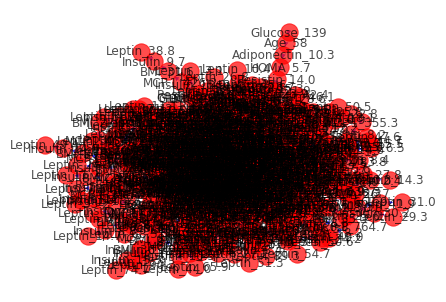

['Glucose_70', 'Age_48', 'Glucose_92', 'Age_83', 'Glucose_91', 'Age_82', 'Glucose_77', 'Age_68', 'Age_86', 'Age_49', 'Age_89', 'Glucose_118', 'Age_76', 'Glucose_97', 'Age_73', 'Glucose_83', 'Age_75', 'Glucose_78', 'Age_34', 'Glucose_82', 'Age_29', 'Age_25', 'Glucose_88', 'Age_24', 'Glucose_75', 'Age_38', 'Glucose_86', 'Age_44', 'Glucose_84', 'Age_47', 'Glucose_85', 'Age_61', 'Glucose_95', 'Age_64', 'Glucose_87', 'Age_32', 'Age_36', 'Age_35', 'Glucose_90', 'Age_54', 'Age_45', 'Glucose_106', 'Age_50', 'Age_66', 'Glucose_80', 'Glucose_101', 'Age_53', 'Age_28', 'Glucose_89', 'Age_43', 'Age_51', 'Glucose_79', 'Age_67', 'Age_69', 'Glucose_103', 'Age_60', 'Glucose_76', 'Age_77', 'Glucose_94', 'Glucose_93', 'Glucose_102', 'Age_71', 'Glucose_60', 'Age_78', 'Glucose_96', 'Age_85', 'Glucose_110', 'Glucose_74', 'Age_42', 'Age_62', 'Glucose_112', 'Glucose_98', 'Age_59', 'Glucose_116', 'Age_46', 'Glucose_114', 'Glucose_105', 'Age_72', 'Age_55', 'Glucose_201', 'Age_41', 'Glucose_100', 'Age_81', 'Gluc

High ranked column ----> Insulin


In [19]:
col_count = 0
imp_attribute = []
edge_impotance_order_final = {}
while (col_count < len(input.columns)):
    # create graph dataset
    another_input_list = create_graph_data(input)

    # create graph and node important for data set
    edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)

    # make important node as primary node
    col_name,imp = column_arrange(col_name,edge_impotance_order)
    
    imp_attribute.append(imp)
    
    edge_impotance_order_final.update({col_count:edge_impotance_weight})

    #arrange the data set as per new order
    input = input.reindex(columns=col_name)
    #input.head(5)
    col_count = col_count + 1
    #print(col_count)

In [20]:
imp_attribute

['HOMA',
 'MCP.1',
 'Glucose',
 'Resistin',
 'HOMA',
 'Adiponectin',
 'Age',
 'Glucose',
 'Insulin']

In [21]:
#

In [22]:
test = pd.DataFrame(edge_impotance_order_final)
#test["attribute_name"] = test.index
test[0:5]

,0,1,2,3,4,5,6,7,8
HOMA_0.7,0.00649,0.00435,0.00439,0.00478,0.00676,0.00415,0.00425,0.00456,0.00521
HOMA_0.8,0.00659,0.00435,0.00439,0.00467,0.00649,0.00415,0.00422,0.00447,0.00514
MCP.1_1698.4,0.00673,0.00651,0.00365,0.00378,0.00388,0.00401,0.00442,0.00444,0.00509
HOMA_1.0,0.00643,0.00435,0.00424,0.00461,0.00629,0.00415,0.00425,0.00452,0.00519
HOMA_1.1,0.00807,0.00435,0.00435,0.00487,0.00666,0.00415,0.00445,0.00463,0.00577


In [23]:
test.shape

(707, 9)

In [24]:
#list(test.index).rpartition('_')[0]
#(list(test.index)[3]).find('_')  #rpartition('_')
test['col_name'] = ''
for i in range(len(test.index)):
    test['col_name'][i] = test.index[i].rpartition('_')[0]

<ipython-input-24-5842f937ae9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['col_name'][i] = test.index[i].rpartition('_')[0]


In [25]:
test['min_of_iteration']= test.min(axis=1)
final = pd.DataFrame(test.groupby(['col_name'])['min_of_iteration'].agg('sum'))

In [26]:
final.sort_values('min_of_iteration')

,min_of_iteration
col_name,
HOMA,0.16527
Glucose,0.17642
Age,0.18014
BMI,0.25054
Adiponectin,0.25988
Resistin,0.28022
Insulin,0.28835
MCP.1,0.33597
Leptin,0.35572


In [27]:
#

In [28]:
test.to_csv('/home/abhishek/Graph/5_Breast_Cancer_Coimbra_output.csv', sep=',', encoding='utf-8')
#pd.DataFrame(test.groupby('sex_1').size().head(10))